**<font size=48> Python Tutorial - 4</font>**<br>
<br>

In this tutorial, we will cover:

- Numerical derivative and integral
- SciPy
- Curve fitting
- Solving differential equations with OdeInt

In [2]:
%matplotlib inline 

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=16)
mpl.rc('xtick', labelsize=12)   
mpl.rc('ytick', labelsize=12)  
mpl.rc('legend', fontsize=12, loc='upper right', labelspacing=0.1)

# Derivative

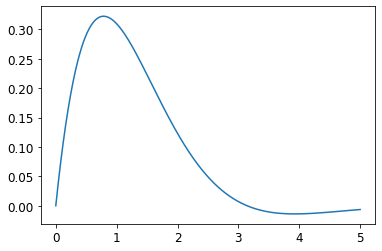

In [16]:
N = 500
x = np.linspace(0, 5, N)
dx = x[1] - x[0]

y = np.exp(-x) * np.sin(x)

plt.plot(x, y);

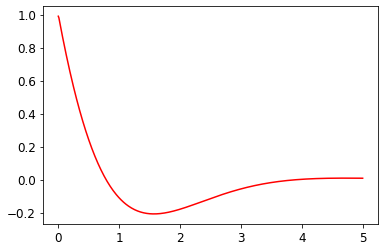

In [17]:
y_derivative = np.gradient(y, dx);
plt.plot(x, y_derivative, 'r-')

# Integral

In [25]:
from scipy import integrate 

$$ \int_a^b f(x) dx $$ 

In [23]:
def func(x):
    return np.exp(-x)

In [29]:
int_y = integrate.quad(func, 0, 100)
print(int_y)

(1.0000000000000002, 5.989345779087516e-12)


In [32]:
N = 1000
x = np.linspace(0, 10, N)
dx = x[1] - x[0]

int_y = np.sum(func(x)) * dx
print(int_y)

1.004968181934117


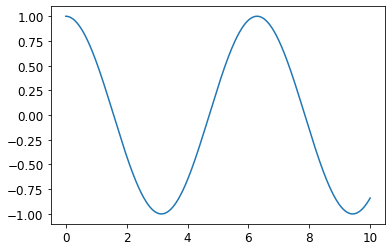

In [34]:
N = 500
x = np.linspace(0, 10, N)
int_y = np.zeros(N)

plt.plot(x, np.cos(x));

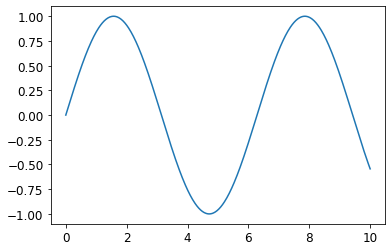

In [37]:
for ind, x_val in enumerate(x):
    int_y[ind] = integrate.quad(lambda x: np.cos(x), 0, x_val)[0]

plt.plot(x, int_y)

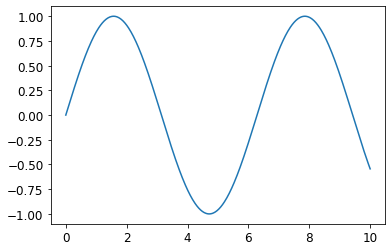

In [38]:
plt.plot(x, np.sin(x));

# SciPy

SciPy is a  Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

Important things to cover:

* Special Functions
* Linear Algebra
* Optimization
* OdeInt

## Special Functions

In [ ]:
scipy.special.jv
scipy.stats.norm

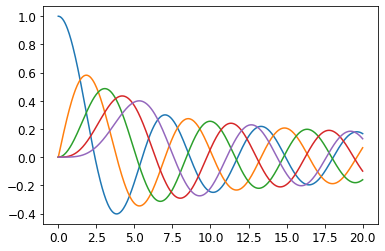

In [45]:
N = 500
z = np.linspace(0, 20, N)

for v in range(5):
    plt.plot(z, scipy.special.jv(v, z));

In [47]:
import scipy.stats

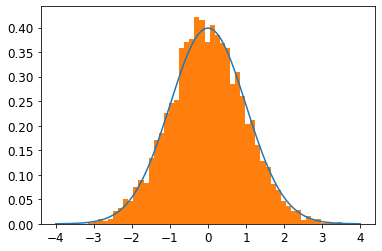

In [54]:
x = np.linspace(-4, 4, 200)
plt.plot(x, scipy.stats.norm.pdf(x));
plt.hist(scipy.stats.norm.rvs(size=5000), density=True, bins=50);

## Linear Algebra

In [60]:
M = np.array([[-1, 2, 6] ,[5, 4, 1], [8, 9, 11]])
print(M)
scipy.linalg.det(M)

[[-1  2  6]
 [ 5  4  1]
 [ 8  9 11]]


-50.99999999999997

In [61]:
M = np.array([[-1, 2, 6] ,[5, 4, 1], [8, 9, 11]])
print(M)
scipy.linalg.eig(M)

[[-1  2  6]
 [ 5  4  1]
 [ 8  9 11]]


(array([16.15660396+0.j, -3.15660396+0.j,  1.        +0.j]),
 array([[ 0.34468877,  0.821949  ,  0.40824829],
        [ 0.2168993 , -0.5590147 , -0.81649658],
        [ 0.91331503, -0.10909818,  0.40824829]]))

## Optimization

In [6]:
from scipy.optimize import curve_fit

In [7]:
def profile(f, f0, gamma, offset):
    return 1 / (1 + ((f-f0) / gamma)**2) + offset;

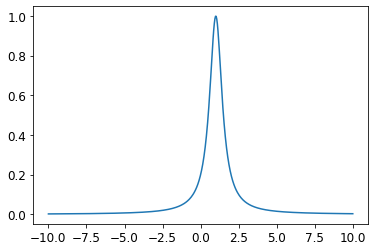

In [9]:
N = 500
f = np.linspace(-10, 10, N)
y = profile(f, 1, 0.5, 0)
plt.plot(f, y);

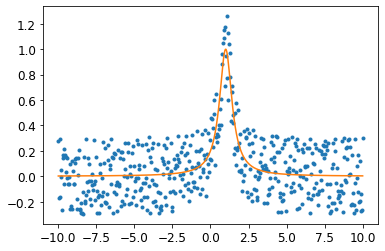

In [11]:
y_data = y + np.random.uniform(-0.3, 0.3, N)

plt.plot(f, y_data, '.');
plt.plot(f, y);

[ 1.00198087e+00  4.77085075e-01 -6.88965560e-04]


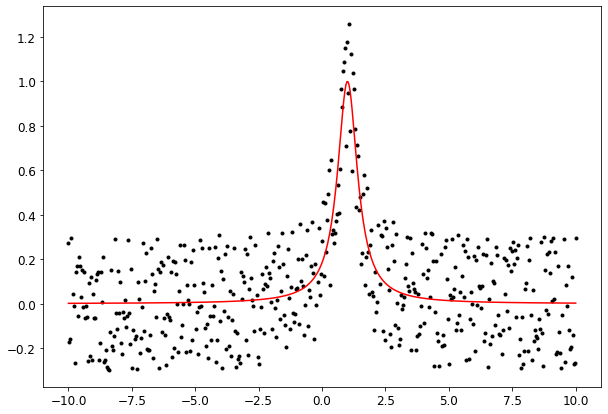

In [17]:
popt, pcov = curve_fit(profile, f, y_data, p0=[0.5, 1, -0.1])
print(popt)

plt.figure(figsize=(10, 7))
plt.plot(f, y_data, 'k.');
plt.plot(f, profile(f, *popt), 'r-');
#plt.plot(f, profile(f, 1, 0.5, 0), '-b');

## Odeint (Harmonic Oscillator)

In [116]:
from scipy.integrate import odeint

$$ m\frac{d^2x}{dt^2}=-kx $$

$$ \ddot{x} = -\omega_0 ^2 x $$ where $\omega_0 \equiv \sqrt{\frac{k}{m}}$

$$ \ddot{x} = -\beta \dot{x} -\omega_0 ^2 (x - A \cos{\omega t}) $$

$$ \frac{d}{dt}[\dot{x}, x] = [..., \dot{x}] $$

In [117]:
def model(u, t, omega_0, beta, omega, amplitude):
    "Provides derivative of vector u."
    xdot, x = u
    return [-(omega_0**2) * x - beta * xdot + amplitude * (omega_0**2) * np.sin(omega * t), xdot]

In [132]:
N = 500;
t = np.linspace(0, 200, N);
y0 = [0, 1] #initial conditions: [v(0), x(0)]

In [133]:
beta = 0
omega = 1
amplitude = 0.5;

sol = odeint(model, y0, t, args=(1, beta, omega, amplitude))

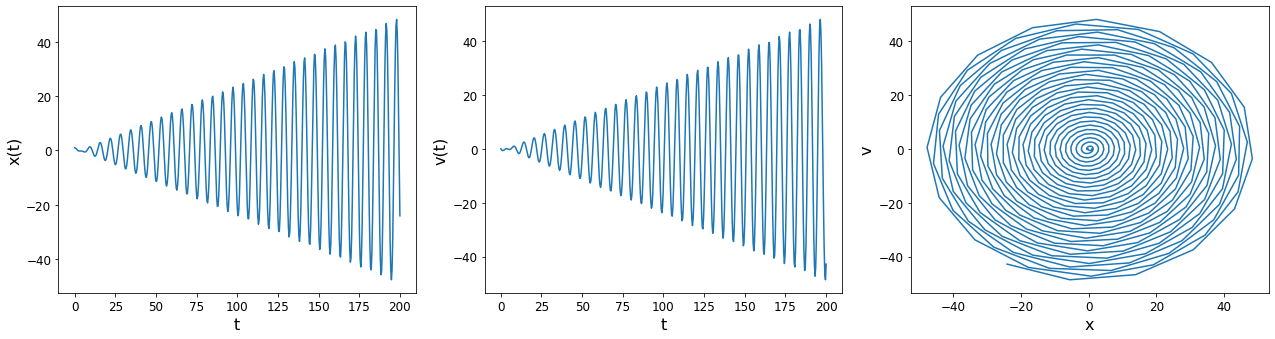

In [134]:
plt.figure(figsize=(18, 5));

ax1 = plt.subplot(1, 3, 1);
plt.plot(t, sol[:, 1]);
plt.xlabel('t');
plt.ylabel('x(t)');

ax2 = plt.subplot(1, 3, 2);
plt.plot(t, sol[:, 0]);
plt.xlabel('t')
plt.ylabel('v(t)');

ax3 = plt.subplot(1, 3, 3);
plt.plot(sol[:,1], sol[:, 0]);
plt.xlabel('x')
plt.ylabel('v');

plt.tight_layout()